On my honor I have neither given nor received help from anyone
during this exam. - MILES TWEED


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
import sympy as sym
import random

# QUESTION 1

In [2]:
def f(n):
    x = []
    for k in range(1,int(n)+1):
        x.append(1/k)
        
    return (n+1)**2 * sum(x)

def g(n):
    x = []
    for k in range(1,int(n)+1):
        x.append(k + 1/k)
        
    return np.log(n+1) * sum(x)    

In [3]:
X = np.linspace(0,10)
y1 = [f(x) for x in X]
y2 = [g(x) for x in X]
y3 = [f(x)/g(x) for x in X]
y4 = [g(x)/f(x) for x in X]

<ipython-input-3-395cffbb0a5d>:4: RuntimeWarning: invalid value encountered in double_scalars
  y3 = [f(x)/g(x) for x in X]
<ipython-input-3-395cffbb0a5d>:5: RuntimeWarning: invalid value encountered in double_scalars
  y4 = [g(x)/f(x) for x in X]


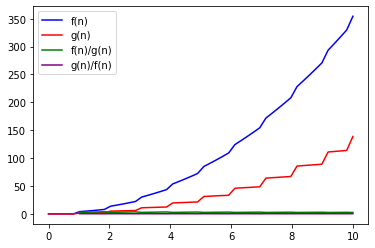

In [4]:
plt.plot(X,y1, color = 'blue', label = 'f(n)')
plt.plot(X,y2, color = 'red', label = 'g(n)')
plt.plot(X,y3, color = 'green', label = 'f(n)/g(n)')
plt.plot(X,y4, color = 'purple', label = 'g(n)/f(n)')
plt.legend()

<ipython-input-5-0a8fca93a7ca>:4: RuntimeWarning: invalid value encountered in double_scalars
  y3 = [f(x)/g(x) for x in X]
<ipython-input-5-0a8fca93a7ca>:5: RuntimeWarning: invalid value encountered in double_scalars
  y4 = [g(x)/f(x) for x in X]


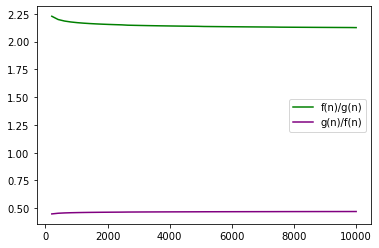

In [5]:
X = np.linspace(0,10000)
y1 = [f(x) for x in X]
y2 = [g(x) for x in X]
y3 = [f(x)/g(x) for x in X]
y4 = [g(x)/f(x) for x in X]
plt.plot(X,y3, color = 'green', label = 'f(n)/g(n)')
plt.plot(X,y4, color = 'purple', label = 'g(n)/f(n)')
plt.legend()

Looking at the graphs, I would conclude that $f(n) = \theta{g(n)}$. considering the largest factors as $n\rightarrow \infty$ for the ratio of $\frac{f(n)}{g(n)}$, $\frac{(n+1)^2(\frac{1}{n})}{\log{(n+1)}\cdot (n+\frac{1}{n})} = \lim{n\rightarrow\infty}\frac{(n+1)^2}{\log(n+1)\cdot(n^2 + 1)} = 1$

# QUESTION 2

In [6]:
np.random.seed(123)
A = []
N = 50
c1 = 5
e = 7

for i in range(N):
    for j in range(c1):
        for k in range(c1):
            T1 = np.random.randint(1,c1+1)
            if T1 > 1:
                A.append([c1*i+j, c1*(i + 1) + k, np.random.randint(1,e)])

# a)

## My graph implementation

In [7]:
class Graph():
    
    from random import shuffle
    from time import time
    import numpy as np
    
    def __init__(self, M):
        # Everything is based off of an adjacency matrix
        self.M = M
        
    def mkGraph(self):
        # Initialize a dictionary object for the graph
        graph = dict()
        
        # Each row in M is a key in the graph
        for i in range(len(self.M)):
            graph[i] = []
            # Add each connection and weight if not zero
            for j in range (len(self.M[i])):
                if self.M[i][j] != 0:
                    graph[i].append((j,self.M[i][j]))
        self.G = graph
        self.vertices = list(range(len(self.G)))
    
    def BFS(self):
        Color = ['w' for x in range(len(self.M))]
        Pred  = [None for x in range(len(self.M))]
        Dist  = [self.np.infty for x in range(len(self.M))]
        
        s = self.vertices[0]
        
        Color[s] = 'y'
        Dist[s]  = 0
        Pred[s]  = None
        Q = [s]
        while len(Q) != 0:
            u = Q.pop(0)
            for V in self.G[u]:
                v = V[0]
                w = V[1]
                if Color[v] == 'w':
                    Color[v] = 'y'
                    Dist[v] = Dist[u] + w
                    Pred[v] = u
                    Q.append(v)
            Color[u] = 'r'
        
        results = [(x, Dist[x], Pred[x], Color[x]) for x in range(len(Color))]
        
        return results
    
    def DFSvisit(self, u):
        #Update the start time and color of u
        self.t += 1
        self.uStart[u] = self.t
        self.uColor[u] = 'y'
        
        # neighbors are every vertex in the graph with key u
        neighbors = sorted([x[0] for x in self.G[u]])
        
        # run DFSvisit on the neighbor if it had not been visited yet
        for v in neighbors:
            if self.uColor[v] == 'w':
                self.uPred[v] = u
                self.DFSvisit(v)
        
        # Update stoptime and color for u
        self.uColor[u] = 'r'
        self.t += 1
        self.uStop[u] = self.t
        self.rt_stp = self.time()
        self.rt = (self.rt_stp - self.rt_strt)*10**3
        
    def DFS(self):
        # Initialize CPU time
        self.rt_strt = self.time()
        
        # These lists store the results of DFS
        self.uColor = ['w' for x in range(len(self.M))]
        self.uPred  = [None for x in range(len(self.M))]
        self.uStart = [None for x in range(len(self.M))]
        self.uStop  = [None for x in range(len(self.M))]
        
        # Initialize the visit time
        self.t = 0
        
        # for each vertex Perform DFSvisit
        for u in self.vertices:
            if self.uColor[u] == 'w':
                self.DFSvisit(u)
                
    def topoSort(self):
        # Topo sort requires the stop times for each vertex
        endTimes = self.uStop
        vert = self.vertices
        
        # combine the vertices and endtimes as tuples
        ts = [(vert[i],endTimes[i]) for i in range(len(vert))]
        # Sort by descending end time
        ts = sorted(ts, key=lambda x: x[1], reverse = True)
        return ts
    
    def DAG_Shotest_Path(self):
        
        self.edges = []
        for i in range(len(self.G)):
            for j in range(len(self.G[i])):
                temp = [i,self.G[i][j][0]]
                self.edges.append((temp[0], temp[1], self.G[i][j][1]))
        self.edges = set(self.edges)
        ts = [x[0] for x in self.topoSort()]

        relaxed = {ts[0]:[0,None]}
        for i in range(1,len(ts)):
            relaxed[ts[i]] = [self.np.infty, None]

        for i in range(len(ts)):
            for edge in self.edges:
                u = edge[0]
                v = edge[1]
                w = edge[2]
                if relaxed[u][0] + w < relaxed[v][0]:
                    relaxed[v][0] = relaxed[u][0] + w
                    relaxed[v][1] = u

        return relaxed
                
        
    def BellmanFord(self):
        vert = self.vertices
        
        #initialize single source [distance, predecessor]
        relaxed = {vert[0]:[0,None]}
        for i in range(1,len(vert)):
            relaxed[vert[i]] = [self.np.infty, None]
            
            
        self.edges = []
        for i in range(len(self.G)):
            for j in range(len(self.G[i])):
                temp = [i,self.G[i][j][0]]
                self.edges.append((temp[0], temp[1], self.G[i][j][1]))
        self.edges = set(self.edges)
        
        for i in range(len(vert)):
            for edge in self.edges:
                u = edge[0]
                v = edge[1]
                w = edge[2]
                if relaxed[u][0] + w < relaxed[v][0]:
                    relaxed[v][0] = relaxed[u][0] + w
                    relaxed[v][1] = u
        for edge in self.edges:
            w = edge[2]
            v = edge[1]
            u = edge[0]
            if relaxed[v][0] > relaxed[u][0] + w:
                return False
        return True, relaxed

        
    def dijkstra(self):
        vert = self.vertices

        #initialize single source [distance, predecessor]
        relaxed = {vert[0]:[0,None]}
        for i in range(1,len(vert)):
            relaxed[vert[i]] = [self.np.infty, None]

        # Initialize the Q with the first vertex [vertex, weight]
        Q = [(vert[0],0)]

        while len(Q) != 0:

            # Extract the first element in the Min Q
            U = Q.pop(0)
            u = U[0]
            
            # check the adjacent vertices and update
            for V in self.G[u]:
                v = V[0]
                w = V[1]
                if relaxed[u][0] + w < relaxed[v][0]:
                    relaxed[v][0] = relaxed[u][0] + w
                    relaxed[v][1] = u

            # Update the min Q
            for con in self.G[u]:
                Q.append(con)
                Q = sorted(Q, key=lambda x: x[1])

        return relaxed
    
    def FW(self):
        M = self.M.astype('float')
        # init M with infinity everywhere except the diagonal and where weights exist
        for i in range(len(M)):
            for j in range(len(M)):
                if i == j:
                    M[i][j] = 0
                elif M[i][j] == 0:
                    M[i][j] = self.np.infty

        #List to keep track of previous matrix
        D = [M]
        # Update the arrays with the lowest connection
        n = len(M)
        for k in range(1,n):
            Dk = D[k-1]
            for i in range(n):
                for j in range(n):
                    Dk[i][j] = min([D[k-1][i][j], D[k-1][i][k] + D[k-1][k][j]])
            D.append(Dk)
        return D[n-1]
    
    def getMaxTime(self):
        try:
            return max(self.uStop)
        except NameError:
            print('DFS must be called first.')
    
    def getRt(self):
        try:
            return self.rt
        except NameError:
            print('DFS must be called first.')
    
    def showGraph(self):
        try:
            print(self.G)
        except NameError:
            self.mkGraph()
            return self.G
        
    def getEdges(self):
        try:
            return self.edges
        except:
            self.edges = []
            for i in range(len(self.G)):
                for j in range(len(self.G[i])):
                    temp = sorted([i,self.G[i][j][0]])
                    self.edges.append((temp[0], temp[1], self.G[i][j][1]))
            self.edges = set(self.edges)
            return self.edges
            
    def getEdgesNW(self):
        edges = []
        for i in range(len(self.G)):
            for j in range(len(self.G[i])):
                temp = sorted([i,self.G[i][j][0]])
                edges.append((temp[0], temp[1]))
        edges = list(set(edges))
        return edges
        
    def __str__(self):
        return 'This object contains the graph and\nassociated method for the following\nmatrix\n{}'.format(M)

In [8]:
G = Graph(A)

In [9]:
G.mkGraph()

## i)

In [10]:
# The number of edges in the graph
len(G.getEdges())

2992

## ii)

The number of vertices is the same as the number of entries in the adjacency list

In [11]:
len(G.vertices)

999

In [12]:
len(A)

999

# b)
### i)

Dijkstra's

Runtime: $O(|V|^2+|E|)$

### ii)

DFS

Runtime: $O(|V|+|E|)$

### iii)

Bellman-Ford

Runtime: $O(|V||E|)$

### iv)

DAG shortest path or BFS

Runtimes: $O(|V|+|E|)$

# c)

The runtimes of these three algorithms vary so I would likely provide it with several graphs of varying size and connectivity and see how the runtime scales. The runtimes are as follows:$$\text{Bellman Ford: }O(|V||E|)$$ $$\text{DAG Shortest-Paths: }O(|V|+|E|)$$ $$\text{Dijkstra's: }O(|V|^2+|E|)$$


If the runtime was roughly linear regardless of the input I could conclude that DAG Shortest paths was used, if the the runtime scaled quadratically with increasing the number of verticies I could conclude dijkstra's and if it scales quadratically when both the vertices and edges were icreased but roughly linearly when using a sparsely connected graph I could conclude Bellman ford.

# QUESTION 3

In [13]:
x, y = sym.symbols('x y')

In [14]:
f = (x-2)**2 + y**2
g = (x**2 + y**2)*((x-2)**2 + y**2)

# a)

In [15]:
f_x = f.diff(x)
f_y = f.diff(y)
grad_f = np.array([f_x, f_y])
print(grad_f)

[2*x - 4 2*y]


In [16]:
g_x = g.diff(x)
g_y = g.diff(y)
grad_g = np.array([g_x, g_y])
print(grad_g)

[2*x*(y**2 + (x - 2)**2) + (2*x - 4)*(x**2 + y**2)
 2*y*(x**2 + y**2) + 2*y*(y**2 + (x - 2)**2)]


# b)

In [17]:
fcx = sym.solve(f_x, x)
fcy = sym.solve(f_y, y)
critPtf = np.array([fcx[0], fcy[0]]) 
print('The critical point for f is: ',critPtf)

The critical point for f is:  [2 0]


In [18]:
gcx = sym.solve(g_x, x)
gcy = sym.solve(g_y, y)
critPtg = np.array([gcx[0], gcy[0]]) 
print('The critical point for g is: ',critPtg)

The critical point for g is:  [1 0]


In [19]:
f_xx = f.diff(x,x)
f_yx = f.diff(y,x)
f_xy = f.diff(x,y)
f_yy = f.diff(y,y)

In [20]:
g_xx = g.diff(x,x)
g_yx = g.diff(y,x)
g_xy = g.diff(x,y)
g_yy = g.diff(y,y)

In [21]:
H_f = np.array([[f_xx, f_xy],[f_yx, f_yy]])
H_g = np.array([[g_xx.subs({'x':1,'y':0}), g_xy.subs({'x':1,'y':0})],[g_yx.subs({'x':1,'y':0}), g_yy.subs({'x':1,'y':0})]])

In [22]:
print(H_f)

[[2 0]
 [0 2]]


In [23]:
print(H_g)

[[-4 0]
 [0 4]]


# d)

In [24]:
def a_k(x,y):
    return 0.1

def f_x(x,y):
    return (a_k(x,y)*(grad_f[0].subs({'x':x,'y':y})))

def f_y(x,y):
    return (a_k(x,y)*(grad_f[1].subs({'x':x,'y':y})))

X=[3]
Y=[3]

X.append(f_x(X[0],Y[0]))
Y.append(f_y(X[0],Y[0]))

while ((math.floor((X[len(X)-2]*10**6 - X[len(X)-1]*10**6)) != 0) and 
       (math.floor((Y[len(Y)-2]*10**6 - Y[len(Y)-1]*10**6)) != 0) ):
    X.append(X[len(X) - 1] - f_x(X[len(X)-1],Y[len(Y)-1]))
    Y.append(Y[len(Y) - 1] - f_y(X[len(X)-1],Y[len(Y)-1]))

print('starting at ',(X[0],Y[0]), ' the minima was found in ',len(X),' iterations')

starting at  (3, 3)  the minima was found in  56  iterations


# e)

In [25]:
def a_k(x,y):
    alphaNume  = grad_f.T.dot(grad_f).subs({'x':x,'y':y})
    alphaDenom = grad_f.T.dot(H_f.dot(grad_f)).subs({'x':x,'y':y})
    return float(alphaNume)/float(alphaDenom)

def f_x(x,y):
    return (a_k(x,y)*(grad_f[0].subs({'x':x,'y':y})))

def f_y(x,y):
    return (a_k(x,y)*(grad_f[1].subs({'x':x,'y':y})))

X=[3]
Y=[3]

X.append(f_x(X[0],Y[0]))
Y.append(f_y(X[0],Y[0]))

while ((math.floor((X[len(X)-2]*10**6 - X[len(X)-1]*10**6)) != 0) and 
       (math.floor((Y[len(Y)-2]*10**6 - Y[len(Y)-1]*10**6)) != 0) ):
    X.append(X[len(X) - 1] - f_x(X[len(X)-1],Y[len(Y)-1]))
    Y.append(Y[len(Y) - 1] - f_y(X[len(X)-1],Y[len(Y)-1]))

print('starting at ',(X[0],Y[0]), ' the minima was found in ',len(X),' iterations')

starting at  (3, 3)  the minima was found in  2  iterations


# f) (This takes a long time)

In [26]:
def a_k(x,y):
    return 0.1

def f_x(x,y):
    return (a_k(x,y)*(grad_f[0].subs({'x':x,'y':y})))

def f_y(x,y):
    return (a_k(x,y)*(grad_f[1].subs({'x':x,'y':y})))

I = [random.randint(-3,3) for x in range(10)]
J = [random.randint(-3,3) for x in range(10)]

iterations = []

for i in I:
    for j in J:
        X=[i]
        Y=[j]

        X.append(f_x(X[0],Y[0]))
        Y.append(f_y(X[0],Y[0]))

        while ((math.floor((X[len(X)-2]*10**6 - X[len(X)-1]*10**6)) != 0) and 
               (math.floor((Y[len(Y)-2]*10**6 - Y[len(Y)-1]*10**6)) != 0) ):
            X.append(X[len(X) - 1] - f_x(X[len(X)-1],Y[len(Y)-1]))
            Y.append(Y[len(Y) - 1] - f_y(X[len(X)-1],Y[len(Y)-1]))
            
        iterations.append(len(X))
        
print('The average number of iteration is {}'.format(sum(iterations)/len(iterations)))

The average number of iteration is 93.14


# g)

The hessian matrix is a matrix of partial second derivatives. $H=\begin{pmatrix}\frac{\partial^2{f}}{\partial{x}^2}&\frac{\partial^2{f}}{\partial{x}\partial{y}}\\\frac{\partial^2{f}}{\partial{y}\partial{x}}&\frac{\partial^2{f}}{\partial{y}^2}\end{pmatrix}$.  It will be a definite-positive diagonal matrix in this case since there will be no cross products.

In [29]:
H = np.matrix([[f.diff(x,x),f.diff(x,y)],[f.diff(y,x),f.diff(y,y)]])
print(H)

[[2 0]
 [0 2]]


In [31]:
f_x = f.diff(x)
f_y = f.diff(y)
grad_f = np.array([f_x, f_y])
print(grad_f)

[2*x - 4 2*y]


In [32]:
def fox(x,y):
    return float(f_x.subs({'x':x,'y':y})/f_xx)

def foy(x,y):
    return float(f_y.subs({'x':x,'y':y})/f_yy)


X=[3]
Y=[3]

X.append(fox(X[0],Y[0]))
Y.append(foy(X[0],Y[0]))

while ((math.floor((X[len(X)-2]*10**6 - X[len(X)-1]*10**6)) != 0) and 
       (math.floor((Y[len(Y)-2]*10**6 - Y[len(Y)-1]*10**6)) != 0) ):
    X.append(X[len(X) - 1] - fox(X[len(X)-1],Y[len(Y)-1]))
    Y.append(Y[len(Y) - 1] - foy(X[len(X)-1],Y[len(Y)-1]))

print('starting at ',(X[0],Y[0]), ' the minima was found in ',len(X),' iterations')

starting at  (3, 3)  the minima was found in  2  iterations
